In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
sns.set_palette("deep")

In [2]:
import os 
os.getcwd()

'/Users/damini/Downloads'

### 1) Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail). 

In [3]:
data = pd.read_csv('/Users/damini/Downloads/WholesaleCustomersData.csv')

In [4]:
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
data.shape

(440, 9)

In [8]:
data.isnull().any()

Buyer/Spender       False
Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicatessen        False
dtype: bool

In [9]:
data.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [10]:
data.Region.value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [11]:
data.Channel.value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [12]:
data.groupby(by = 'Channel').sum().sort_values(by='Buyer/Spender',ascending=False)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [13]:
data.groupby(by = 'Channel').sum().sort_values(by='Buyer/Spender',ascending=True)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Retail,25986,1264414,1521743,2317845,234671,1032270,248988
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955


Text(0.5, 1.0, 'Channels Vs Buyer/spender')

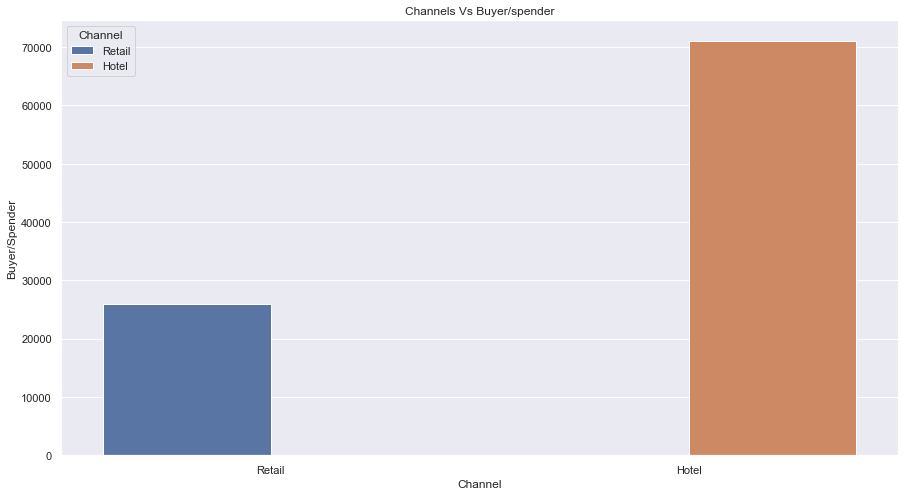

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x='Channel',y='Buyer/Spender',data=data,hue ='Channel',ci=None,estimator=np.sum)
plt.title('Channels Vs Buyer/spender')

In [15]:
data.groupby(by = 'Region').sum().sort_values(by='Buyer/Spender',ascending=False)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Other,64026,3960577,1888759,2495251,930492,890410,512110
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506


In [16]:
data.groupby(by = 'Region').sum().sort_values(by='Buyer/Spender',ascending=True)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Oporto,14899,464721,239144,433274,190132,173311,54506
Lisbon,18095,854833,422454,570037,231026,204136,104327
Other,64026,3960577,1888759,2495251,930492,890410,512110


Text(0.5, 1.0, 'Region Vs Buyer/spender')

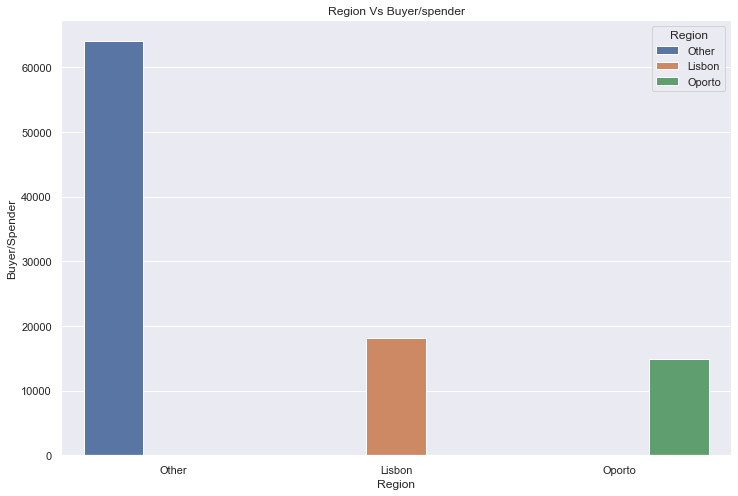

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x='Region',y='Buyer/Spender',data=data,hue='Region',ci=None,estimator=np.sum)
plt.title('Region Vs Buyer/spender')

Text(0.5, 1.0, 'Region with channels Vs Buyer/spender')

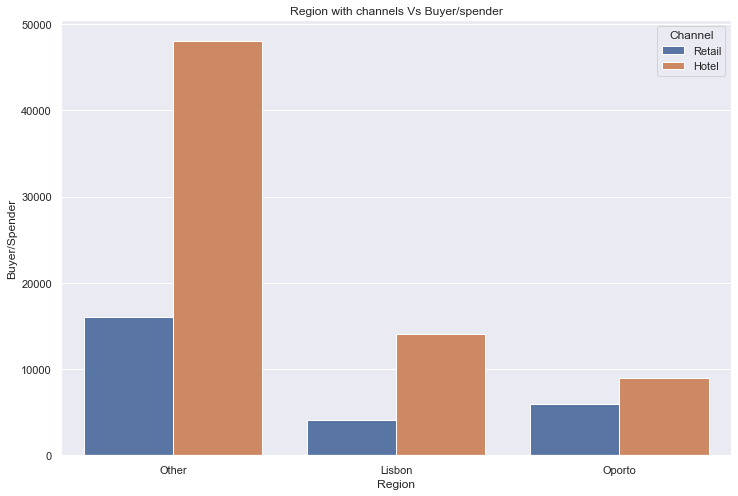

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x='Region',y='Buyer/Spender',data=data,hue ='Channel',ci=None,estimator=sum)
plt.title('Region with channels Vs Buyer/spender')

### SUMMARY : -

The region "OTHER" with channel "HOTEL" has spent the most as per the plot and the region "OPORTO" with channel "RETAIL" has spent the least.

As we can see in the above codes and bar graphs(Channels Vs Buyer/spender & Region Vs Buyer/spender),Retail and Oporto is lower and hence it's(Oporto) on the right of both the graphs but the graph(Region with channels Vs Buyer/spender)shows,Retail in the lisbon is the lowest.

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [19]:
data.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [20]:
data_1=data.groupby(by='Region')['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'].std()/data.mean()
data_1

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,,
Lisbon,NaN,0.882320,1.460515,0.963096,1.006580,1.068544,0.984230
Oporto,NaN,0.689068,2.260883,0.698974,2.979163,1.363648,1.005189
Other,NaN,2.119906,1.593983,1.115740,1.386791,1.199466,1.369065


In [21]:
data_2=data.groupby(by='Channel')['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'].std()/data.mean()
data_2

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,,
Hotel,NaN,2.064062,0.383167,1.152612,1.837252,0.445905,0.750857
Retail,NaN,1.281287,2.183274,0.748958,0.590118,1.542811,1.669977


In [22]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data['Fresh']),stats.skew(data['Milk']),stats.skew(data['Grocery']),stats.skew(data['Frozen']),stats.skew(data['Detergents_Paper']),stats.skew(data['Delicatessen'])]},
index=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']) # Measure the skeweness of the required columns
Skewness

,Skewness
Fresh,2.552583
Milk,4.039922
Grocery,3.575187
Frozen,5.887826
Detergents_Paper,3.619458
Delicatessen,11.113534


Text(0.5, 0, 'Grocery')

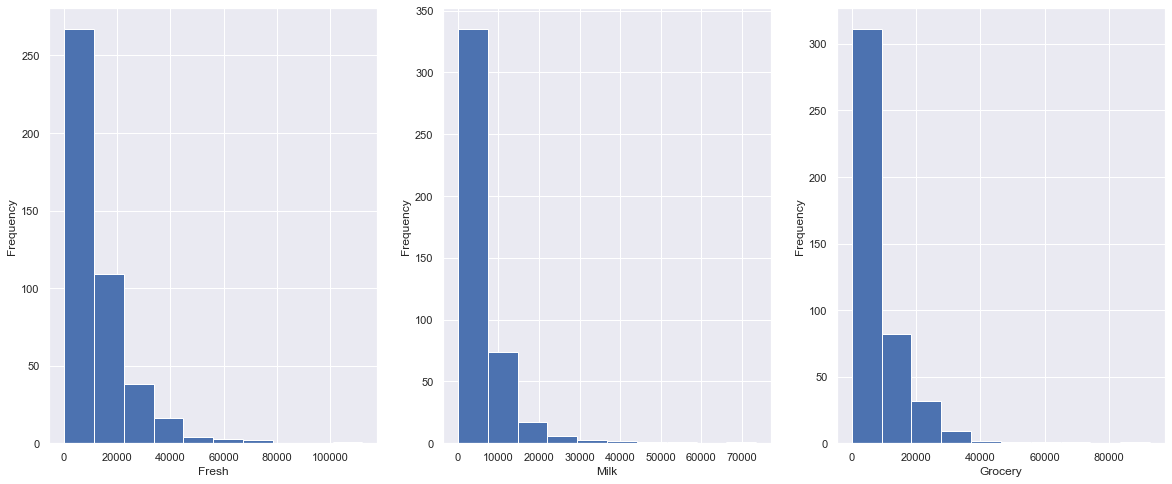

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
data.Fresh.plot(kind = 'hist')
plt.xlabel('Fresh')
plt.subplot(1,3,2)
data.Milk.plot(kind = 'hist')
plt.xlabel('Milk')
plt.subplot(1,3,3)
data.Grocery.plot(kind = 'hist')
plt.xlabel('Grocery')

### SUMMARY :-

As we can see from the describe function , Fresh variety has the highest values for Means,Standard deviation,Quartiles and Maximum. And Milk variety shows the highest value for minimum i.e.,55.00. Grocery shows the 2nd highest mean value followed by Milk ,Frozen ,Detergent_Paper and Delicatessen and same pattern is been followed by the Standard Deviation.

As we come to describe the data based on Region by covariance(std/mean),the Region, Lisbon show the highest value of covariance for Detergent_Paper variety followed by Grocery, Frozen, Milk, Fresh and Delicatessen. For the Region Oporto the highest value of covariance is for Frozen followed by Detergent_Paper,Grocery,Milk,Fresh and Delicatessen. And for Other Region the highest value of covariance is for Delicatessen followed by Detergent_Paper,Frozen,Milk,Grocery,Fresh.

As we come to describe the data based on Channel by covariance(std/mean), the Channel, Hotel show the highest value of covariance for Delicatessen followed by Frozen, Fresh, Milk, Grocery and Detergent_Paper. And for Retail, Channel the highest value of covariance is for Detergent_Paper followed by Milk, Grocery, Delicatessen, Fresh and Frozen.

And another parameter skewness, gives the analysis that Delicatessen variety shows the highest skeweness value i.e., 11.11 followed by Frozen, Milk, Detergent_Paper, Grocery and Fresh. Here, all of them are right skewed(positively skewed or outliers are in positive direction of normal distribution curve) as some of them has been represented in a plot.

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?


In [25]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [26]:
data.mean()

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [27]:
data.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [28]:
data.quantile(.25)

Buyer/Spender        110.75
Fresh               3127.75
Milk                1533.00
Grocery             2153.00
Frozen               742.25
Detergents_Paper     256.75
Delicatessen         408.25
Name: 0.25, dtype: float64

In [29]:
data.quantile(.75)

Buyer/Spender         330.25
Fresh               16933.75
Milk                 7190.25
Grocery             10655.75
Frozen               3554.25
Detergents_Paper     3922.00
Delicatessen         1820.25
Name: 0.75, dtype: float64

In [30]:
IQR = data.quantile(.75)-data.quantile(.25)
IQR

Buyer/Spender         219.50
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

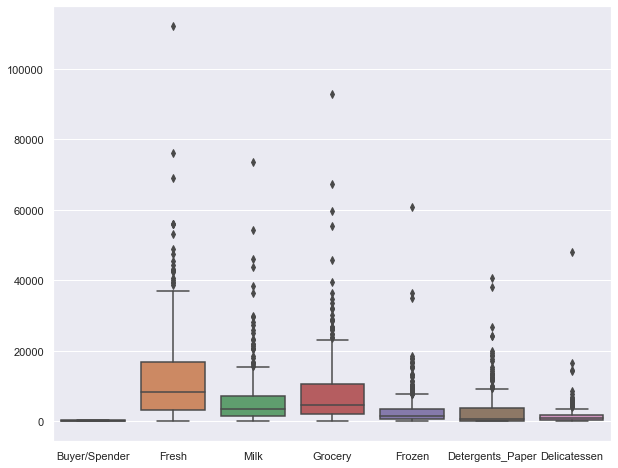

In [31]:
plt.figure(figsize = (10,8))
sns.boxplot(data=data)
plt.show

Inter Quartile Range is a measurement of variability about the median. IQR, majorly shown using Boxplot and the larger values indicates that the central portion of data spreads out further. And smaller values show that the middle values cluster more tightly. Hence, another descriptive measures of variability should be considered for more appropriate results.

In [33]:
data.var()

Buyer/Spender       1.617000e+04
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

In [32]:
CV = data.std()/data.mean()
CV

Buyer/Spender       0.576695
Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

### SUMMARY :-

Inter Quartile Range is a measurement of the variability about the median.
Standard Deviation is a measure of the amount of variation or dispersion of a set of values.
Coefficient of Variation(CV) is the ratio of standard deviation to mean.

On the basis of a descriptive measures of variability such as; Inter Quartile Range , Standard deviation and Coefficient of Variance,The Coefficient of Variation(CV) seems the most appropriate way of measurement here as CV measures the level of despersion around the mean. Higher the value of CV,greater the level of dispersion around the mean i.e.,most inconsistent behaviour and here shown by "Delicatessen" variety with value of 1.84907 and lower the value of CV,more percise is the estimate i.e.,least inconsistent behaviour and here shown by variety "Fresh" with value of 1.053918.



### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<function matplotlib.pyplot.show(close=None, block=None)>

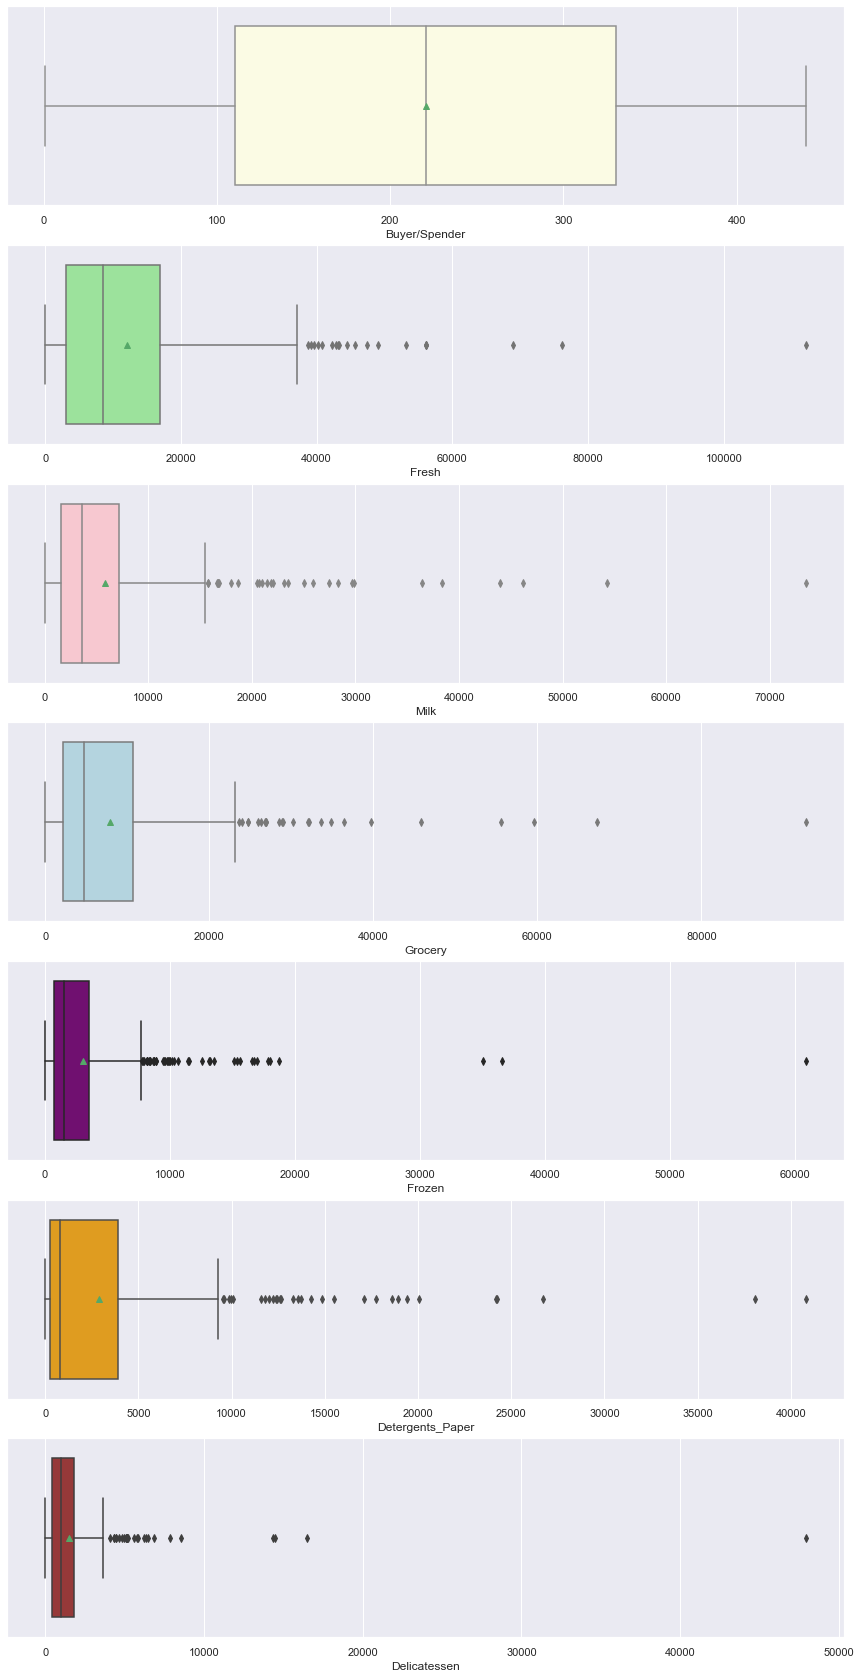

In [34]:
plt.figure(figsize=(15,30))
plt.subplot(7,1,1)
sns.boxplot(x='Buyer/Spender',color='lightyellow',data=data,showmeans=True)

plt.subplot(7,1,2)
sns.boxplot(x='Fresh',color='lightGreen',data = data,showmeans=True)

plt.subplot(7,1,3)
sns.boxplot(x='Milk',color='pink',data = data,showmeans=True)

plt.subplot(7,1,4)
sns.boxplot(x='Grocery',color='lightblue',data=data,showmeans=True)

plt.subplot(7,1,5)
sns.boxplot(x='Frozen',color='purple',data = data,showmeans=True)

plt.subplot(7,1,6)
sns.boxplot(x='Detergents_Paper',color='orange',data = data,showmeans=True)

plt.subplot(7,1,7)
sns.boxplot(x='Delicatessen',color='brown',data = data,showmeans=True)


plt.show

###  SUMMARY :-

On considering the whole data, only column Buyer/spender does not show any outlier and rest of all the other varieties have outliers or data points beyond thier whiskers. Where far fetched value goes for 'Fresh' variety outlier i.e., 112151.0 units and the least fetched value goes for 'Detergents_Paper'variety outlier i.e., 40827.0 units.



## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

### SOLUTION :
On the basisi of my analysis, the Hotel of Other Region had most of the deals as in Buyers/Spenders and Retail of Oporto Region had lower deals but the least happened in Retail of Lisbon Region and hence more focus should be given in the Retail Channels of Lisbon and Oporto region for the growth of Business.

As the analyis was done on the all six different varieties across Region and Channel, Fresh variety has the highest values for Means,Standard deviation,Quartiles and Maximum. And Milk variety shows the highest value for minimum i.e.,55.00. Hence,Fresh variety should be maintained and Milk variety is an area to be worked on across various channel and region.

As we come to describe the data based on Region by covariance(std/mean),the Region, Lisbon show the highest value of covariance for Detergent_Paper variety followed by Grocery, Frozen, Milk, Fresh and Delicatessen. For the Region Oporto the highest value of covariance is for Frozen followed by Detergent_Paper,Grocery,Milk,Fresh and Delicatessen. And for Other Region the highest value of covariance is for Delicatessen followed by Detergent_Paper,Frozen,Milk,Grocery,Fresh.Hence, in Lisbon region, Detergent_Paper,Grocery and Frozen varieties should be looked at to maintain the sales then in Oporto region, Frozen, Detergent_Paper and Grocery varieties ought to be checked out to keep up with the sale and in Other region, Delicatessen,Detergent_Paper and Frozen varieties should be looked at to stay aware of the arrangements.

As we come to describe the data based on Channel by covariance(std/mean), the Channel, Hotel show the highest value of covariance for Delicatessen followed by Frozen, Fresh, Milk, Grocery and Detergent_Paper. And for Retail, Channel the highest value of covariance is for Detergent_Paper followed by Milk, Grocery, Delicatessen, Fresh and Frozen.So,in Hotel channel,Delicatessen, Frozen ans Fresh varieties should be channelised to maintain the sale and then in Retail channel, Detergent_Paper, Milk and Grocery varieties ought to be checked out to keep up with the sale.

On the basis of a descriptive measures of variability,the ,most inconsistent behaviour is shown by "Delicatessen" variety with CV value of 1.84907 and the least inconsistent behaviour is shown by variety "Fresh" with CV value of 1.053918.Hence,Delicatessen inconsistent behaviour should be checked on and try to lower it.

And all the varieties show positive outliers or are right skewed and it’s not normal distribution so they should be considered while making decisions.



### 2) Problem Statement:

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).




In [35]:
df = pd.read_csv('/Users/damini/Downloads/Survey.csv')

In [36]:
df.head(20)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100


In [38]:
df.shape

(62, 14)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [41]:
df.describe(include ="all")

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)



#### 2.1.1. Gender and Major

In [42]:
pd.crosstab(df['Gender'],df['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


#### 2.1.2. Gender and Grad Intention



In [44]:
pd.crosstab(df['Gender'],df['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


#### 2.1.3. Gender and Employment

In [45]:
pd.crosstab(df['Gender'],df['Employment'] )

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


#### 2.1.4. Gender and Computer

In [46]:
pd.crosstab(df['Gender'],df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [47]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [48]:
print('Probability that a randomly selected candidate will be male:',29/len(df['Gender']))

Probability that a randomly selected candidate will be male: 0.46774193548387094


#### 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [49]:
print('Probability that a randomly selected candidate will be female:',33/len(df['Gender']))

Probability that a randomly selected candidate will be female: 0.532258064516129


### 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [50]:
pd.crosstab(df['Gender'],df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


 P (Major | Male) = P (Major ∩ Male)/ P(Male)

In [51]:
print('Among MALE candidates:')
print('Probability of having Accounting in Major:',4/29)
print('Probability of having CIS in Major:',1/29)
print('Probability of having Economics/Finance in Major:',4/29)
print('Probability of having International Business in Major:',2/29)
print('Probability of having Management in Major:',6/29)
print('Probability of having other in Major:',4/29)
print('Probability of having Retailing/Marketing in Major:',5/29)
print('Probability of having Undecided in Major:',3/29)
print()

Among MALE candidates:
Probability of having Accounting in Major: 0.13793103448275862
Probability of having CIS in Major: 0.034482758620689655
Probability of having Economics/Finance in Major: 0.13793103448275862
Probability of having International Business in Major: 0.06896551724137931
Probability of having Management in Major: 0.20689655172413793
Probability of having other in Major: 0.13793103448275862
Probability of having Retailing/Marketing in Major: 0.1724137931034483
Probability of having Undecided in Major: 0.10344827586206896



#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [52]:
pd.crosstab(df['Gender'],df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


P (Major | Female) = P (Major ∩ Female)/ P(Female)

In [53]:
print('Among FEMALE candidates:')
print('Probability of having Accounting in Major:',3/33)
print('Probability of having CIS in Major:',3/33)
print('Probability of having Economics/Finance in Major:',7/33)
print('Probability of having International Business in Major:',4/33)
print('Probability of having Management in Major:',4/33)
print('Probability of having other in Major:',3/33)
print('Probability of having Retailing/Marketing in Major:',9/33)
print('Probability of having Undecided in Major:',0/33)
print()

Among FEMALE candidates:
Probability of having Accounting in Major: 0.09090909090909091
Probability of having CIS in Major: 0.09090909090909091
Probability of having Economics/Finance in Major: 0.21212121212121213
Probability of having International Business in Major: 0.12121212121212122
Probability of having Management in Major: 0.12121212121212122
Probability of having other in Major: 0.09090909090909091
Probability of having Retailing/Marketing in Major: 0.2727272727272727
Probability of having Undecided in Major: 0.0



### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [54]:
df['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

No. of Grad Intention male = 17                                                                           
No. of Undecide Grad Intention male = 9

In [55]:
print("P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (Male) = ",(17/29) * (29/62))

P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (Male) =  0.27419354838709675


Along with undecide undecide Grad Intention male = 26

In [56]:
print("P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (Male) = ",(26/29) * (29/62))

P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (Male) =  0.4193548387096774


#### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.
No.of Female = 33                                                                                               
No.of Females have laptop = 29                                                                                 
No.of Female does not have laptop = 33-29 = 4

In [57]:
print("P(Female does not have a laptop ∩ Female) = P (Female does not have a laptop| Female) x P (Female) = ",(4/33) * (33/62))

P(Female does not have a laptop ∩ Female) = P (Female does not have a laptop| Female) x P (Female) =  0.06451612903225806


### 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

No. of male students = 29                                                                                         
No. has full - time employment = 10                                                                                   
No.of male having full time employment = 7

In [59]:
print('Probability of randomly chosing a male student or full- time employment:',29/62+10/62-7/62) 

Probability of randomly chosing a male student or full- time employment: 0.5161290322580645


#### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.
P (International Business OR Management | Female) = P (International Business OR Management ∩ Female)/ P(Female)

Female doing major in International Bussiness =4                                                                
Female doing major in Management =4

In [60]:
print('Probability of Female having international business or management as Major:',8/33) 

Probability of Female having international business or management as Major: 0.24242424242424243


### 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?



In [61]:
df1 = df.where(df['Grad Intention']!='Undecided')
df1.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1.0,Female,20.0,Junior,Other,Yes,2.9,Full-Time,50.0,1.0,3.0,350.0,Laptop,200.0
1,2.0,Male,23.0,Senior,Management,Yes,3.6,Part-Time,25.0,1.0,4.0,360.0,Laptop,50.0
2,3.0,Male,21.0,Junior,Other,Yes,2.5,Part-Time,45.0,2.0,4.0,600.0,Laptop,200.0
3,4.0,Male,21.0,Junior,CIS,Yes,2.5,Full-Time,40.0,4.0,6.0,600.0,Laptop,250.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Female,20.0,Junior,Management,Yes,3.6,Unemployed,30.0,0.0,4.0,500.0,Laptop,400.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
pd.crosstab(df1['Gender'],df1['Grad Intention'])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [63]:
df1['Grad Intention'].value_counts()

Yes    28
No     12
Name: Grad Intention, dtype: int64

For 2 events to be independent, following condition is to be satified

P(A ∩ B) = P(A) * P(B)

So, P (Grad Intention ∩ Female) = P(Grad Intention) * P(Female)

P(Female) = 20/40 = 0.5

P(Grad Intention) = 28/40 = 0.7

P(Grad Intention) P(Female) = 0.7 0.5 = 3.5

P(Grad Intention ∩ Female) = 11/40 = 0.275

This is not independent events as probability multiplication of both events is not equal to combined event, so being a Grad Intention and being female candidate are not independent events.



### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.Answer the following questions based on the data.

#### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [64]:
df.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [65]:
df.GPA.value_counts().reset_index()

,index,GPA
0,3.0,7
1,3.1,7
2,3.4,7
3,3.5,6
4,2.5,6
5,3.2,6
6,3.3,5
7,2.9,4
8,2.8,3
9,3.6,3


In [66]:
df.GPA.unique()

array([2.9, 3.6, 2.5, 2.8, 2.3, 3. , 3.1, 3.3, 3.5, 3.4, 3.2, 3.7, 2.6,
       3.9, 3.8, 2.4])

In [67]:
#Pr(GPA is less than 3) = Pr(2.3)*1 + Pr(2.4)*1 +Pr(2.5)*6 + Pr(2.6)*2 + Pr(2.8)*3 + Pr(2.9)*4  
not_more_than_3=17
Total=62
Prob_GPA_is_less_than_3=(round(not_more_than_3/Total,4))*100
print('Probability of a student that his/her GPA is less than 3 is %1.1f' % Prob_GPA_is_less_than_3  +'%')

Probability of a student that his/her GPA is less than 3 is 27.4%


#### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [68]:
df['Salary'].value_counts().reset_index()

,index,Salary
0,40.0,12
1,50.0,9
2,55.0,8
3,60.0,8
4,45.0,5
5,30.0,5
6,35.0,2
7,80.0,2
8,47.5,1
9,54.0,1


In [69]:
pd.crosstab(df['Gender'],df['Salary'])

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


P (Salary>50 | male) = P (Salary>50 ∩ male)/ P(male)

In [70]:
print('Probability of that a randomly selected Male earns 50 or more is :',14/29)

Probability of that a randomly selected Male earns 50 or more is : 0.4827586206896552


P (Salary>50 | Female) = P (Salary>50 ∩ Female)/ P(Female)

In [71]:
print('Probability of that a randomly selected Female earns 50 or more is :',18/33)

Probability of that a randomly selected Female earns 50 or more is : 0.5454545454545454


### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

In [72]:
df.GPA.describe()

count    62.000000
mean      3.129032
std       0.377388
min       2.300000
25%       2.900000
50%       3.150000
75%       3.400000
max       3.900000
Name: GPA, dtype: float64

In [73]:
df.GPA.mode()

0    3.0
1    3.1
2    3.4
dtype: float64

In [74]:
df.GPA.median()

3.1500000000000004

In [75]:
stats.shapiro(df["GPA"])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

([<matplotlib.axis.XTick at 0x7f923f62afd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

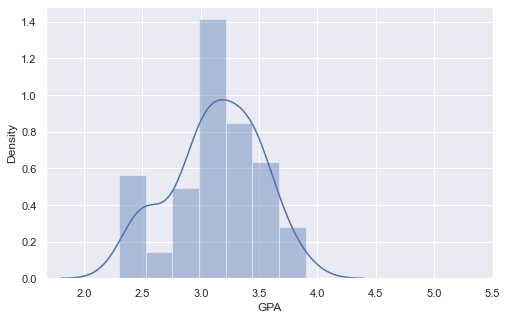

In [79]:
plt.figure(figsize=(8,5))
sns.distplot(df['GPA'])
plt.xticks(np.arange(2,6,0.5))

The GPA follows normal distribution as the ShapiroResult's p-value (0.11204058676958084) > alpha(0.5).

In [77]:
df.Salary.describe()

count    62.000000
mean     48.548387
std      12.080912
min      25.000000
25%      40.000000
50%      50.000000
75%      55.000000
max      80.000000
Name: Salary, dtype: float64

In [78]:
df.Salary.mode()

0    40.0
dtype: float64

In [80]:
df.Salary.median()

50.0

In [81]:
stats.shapiro(df["Salary"])

ShapiroResult(statistic=0.9565857648849487, pvalue=0.028001394122838974)

([<matplotlib.axis.XTick at 0x7f9240ee1940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

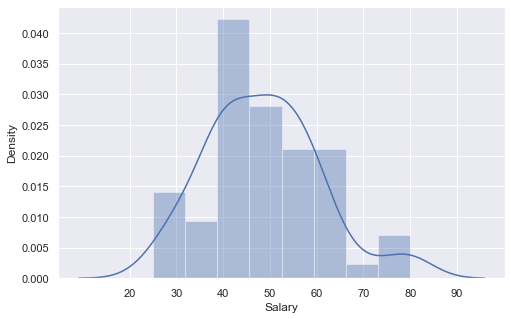

In [82]:
plt.figure(figsize=(8,5))
sns.distplot(df['Salary'])
plt.xticks(np.arange(20,100,10))

The Salary does not follows normal distribution as the ShapiroResult's p-value (0.028001394122838974) < alpha(0.5).

In [83]:
df.Spending.describe()

count      62.000000
mean      482.016129
std       221.953805
min       100.000000
25%       312.500000
50%       500.000000
75%       600.000000
max      1400.000000
Name: Spending, dtype: float64

In [84]:
df.Spending.mode()

0    500
dtype: int64

In [85]:
df.Spending.median()

500.0

In [86]:
stats.shapiro(df["Spending"])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

<AxesSubplot:xlabel='Spending', ylabel='Density'>

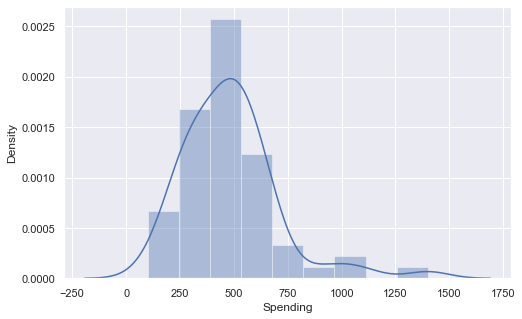

In [87]:
plt.figure(figsize=(8,5))
sns.distplot(df['Spending'])

The Spending does not follows normal distribution as the ShapiroResult's p-value (1.6854661225806922e-05) < alpha(0.5).

In [89]:
df['Text Messages'].describe()

count     62.000000
mean     246.209677
std      214.465950
min        0.000000
25%      100.000000
50%      200.000000
75%      300.000000
max      900.000000
Name: Text Messages, dtype: float64

In [90]:
df['Text Messages'].mode()

0    300
dtype: int64

In [91]:
df['Text Messages'].median()

200.0

In [92]:
stats.shapiro(df["Text Messages"])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

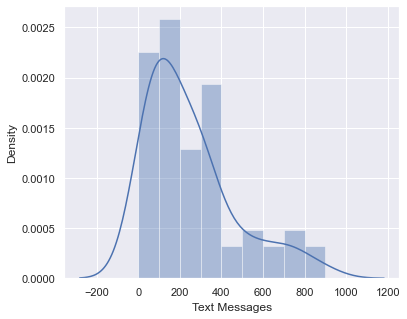

In [93]:
plt.figure(figsize=(6,5))
sns.distplot(df['Text Messages'])

The Text Messages does not follows normal distribution as the ShapiroResult's p-value (4.324040673964191e-06) < alpha(0.5).

### 2.8.2 Write a note summarizing your conclusions.
Out of all the four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages only "GPA" follows normal distribution as shows the shapiroresult p-value less than alpha value.

The information that we have accumulated from this report, we can presume that a large portion of the guys favor Management as Majors and least lean toward CIS as Majors. Then again,the majority of the females lean toward Retailing/Marketing and no female is unsure which implies all the females from the information have thought about a Major. More men have the expectation to graduate than ladies. The majority of the alumni lean toward low maintenance work, very few lean toward regular work or are jobless. The vast majority of the graduate have PC, not very many have work areas or tablets.

## 3) Problem Statement :-

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging. In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [552]:


In [94]:
mydata = pd.read_csv('/Users/damini/Downloads/A&Bshingles.csv')

In [95]:
mydata.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [97]:
mydata.shape

(36, 2)

In [102]:
mydata.size

72

In [100]:
mydata.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [103]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


## 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#### SOLUTION :- For A shingles

In [104]:
import math
from scipy import stats
from scipy.stats import   ttest_1samp,ttest_ind

##### STEP 1 :
NULL HYPOTHESIS (HO) = Mean Moisture Content <= 0.35                                                        
ALTERNATE HYPOTHESIS (HA) = Mean Moisture Content > 0.35

##### STEP 2 :

Alpha = 0.05

In [105]:
print("The sample size for this problem is",len(mydata))

The sample size for this problem is 36


##### STEP 3 :

1 sample t-test

##### STEP 4 : Calculate the p - value and test statistic

In [106]:
t_statistic, p_value = ttest_1samp(mydata, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2,nan_policy='omit'))

One sample t test 
t statistic: [-1.47350463         nan] p value: [0.07477633        nan] 


##### Step 5 : Decide to reject or accept null hypothesis


Level of significance: 0.05                                                                                  
We have no evidence to reject the null hypothesis since p value > Level of significance                            
Our one-sample t-test p-value= [0.07477633 ]
    
In here, p value is 0.07477633 and it is greater than 5% level of significance.                                    
So the statistical decision is failing to reject the null hypothesis at 5% level of significance.

### So at 95% confidence level, there is sufficient evidence to prove that mean moisture content in shingles A is within the permissible limit.

#### SOLUTION :- For shingles B

##### STEP 1 :
NULL HYPOTHESIS (HO) = Mean Moisture Content <= 0.35                                                           
ALTERNATE HYPOTHESIS (HA) = Mean Moisture Content > 0.35

##### STEP 2 :
Alpha = 0.05

In [108]:
mydata1 = mydata.drop('A',axis = 1)

In [109]:
mydata2 = mydata1.dropna()

In [110]:
print("The sample size for this problem is",len(mydata2))

The sample size for this problem is 31


##### STEP 3 :

1 Sample t-test

##### STEP 4 : Calculate the p - value and test statistic

In [111]:
t_statistic, p_value = ttest_1samp(mydata2, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2,nan_policy='omit'))

One sample t test 
t statistic: [-3.10033131] p value: [0.00209048] 


##### Step 5 : Decide to reject or accept null hypothesis

Level of significance: 0.05                                                                                     
We have evidence to reject the null hypothesis since p value < Level of significance                            
Our one-sample t-test p-value= [0.00209048]

In here, p value is 0.00209048 and it is less than 5% level of significance.                                   
So the statistical decision is rejecting the null hypothesis at 5% level of significance.

### So at 95% confidence level, there is sufficient evidence to prove that mean moisture content in shingles B is not within the permissible limit.


## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [112]:
mydata.head(10)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


##### STEP 1 :
In testing,the null hypothesis states that the population mean for both the shingles are same,i.e.,𝜇A = 𝜇B. The alternate hypothesis states that the population mean for both the shingles are not same,i.e., 𝜇A ≠ 𝜇B.

NULL HYPOTHESIS (HO) -> 𝜇A = 𝜇B                                                                        
ALTERNATE HYPOTHESIS (HA) -> 𝜇A ≠ 𝜇B

##### To perform Hypothesis Testing, the following assumptions must hold,

1. The variables must follow continuous distribution.
2. The sample must be randomly collected from the population
3. The underlying distribution must be normal. Alternatively, if the data is continious, but may not be assumed to follow a normal distribution, a reasonlably large sample size is required. Central Limit Theorem asserts that sample mean follows a normal distribution, even if the population distribution is not normal, when sample size is atleast 30.
4. For 2 sample t-test, the population variances of 2 distributions must be equal.

##### STEP 2 :
Here we select 𝛼

α = 0.05

##### STEP 3 :


* We have two samples.
* Sample sizes for both samples are not same.
* The sample is a large sample, n > 30. So, use the t distribution and the 
t
S
T
A
T
test statistic for two sample unpaired test.

##### STEP 4 :

In [113]:
t_statistic, p_value  = ttest_ind(mydata['A'],mydata['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)    

tstat 1.2896282719661123
P Value 0.2017496571835306


##### STEP 5 :

In [114]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("Two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean of both the shingles are not same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that population mean of both the shingles are same.')

Two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that population mean of both the shingles are same.


#### So, at 95% confidence level, there is sufficient evidence to prove that the population mean for both the shingles are equal i.e., 𝜇A = 𝜇B. Hence, we cannot refute the assumptions.

### Conclusion :

From the given data, it may be concluded that, statistically that the population mean moisture content of both the shingles are same . However, our recommendation is that the test be carried out with a larger sample size to improve the accuracy of test result and negating any resulting shingles appearence problem. Also, the results need to be interpreted and future actions be planned with the understanding of overall business performance.